In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl 
from sklearn import preprocessing 
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [15]:
house = pd.read_csv("D:\科目文件\大数据导论\midterm\kc_house_data.csv")
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,165,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,222,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,300,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,222,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,293,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,11,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,57,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,259,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,349,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,315,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


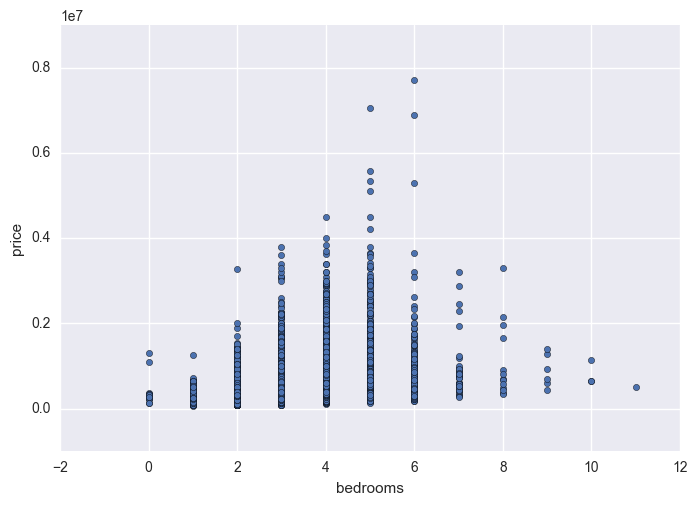

In [16]:
#数据可视化，散点图，箱体图绘制
house.plot(kind="scatter", x="bedrooms", y="price")
sns.plt.show()

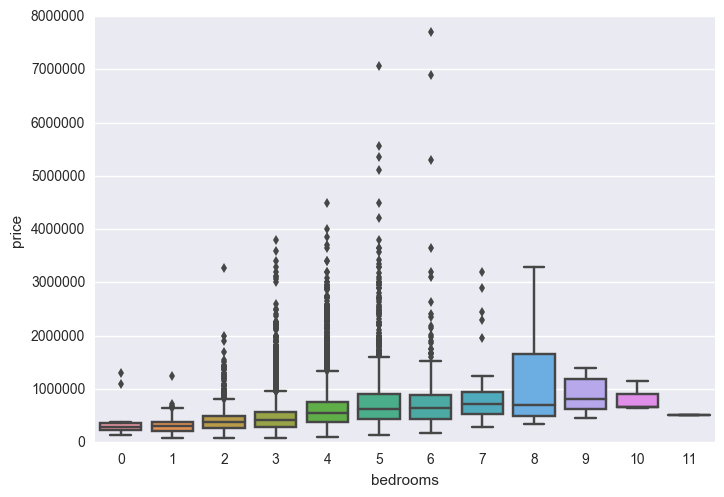

In [17]:
sns.boxplot(x="bedrooms", y="price", data=house)
sns.plt.show()

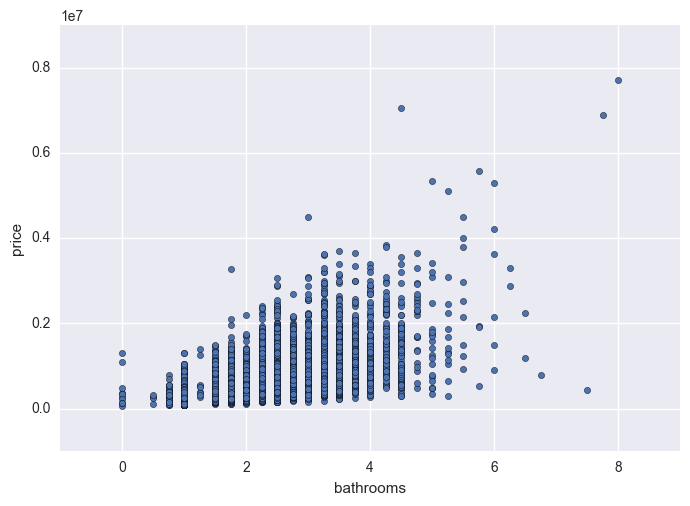

In [19]:
house.plot(kind="scatter", x="bathrooms", y="price")
sns.plt.show()

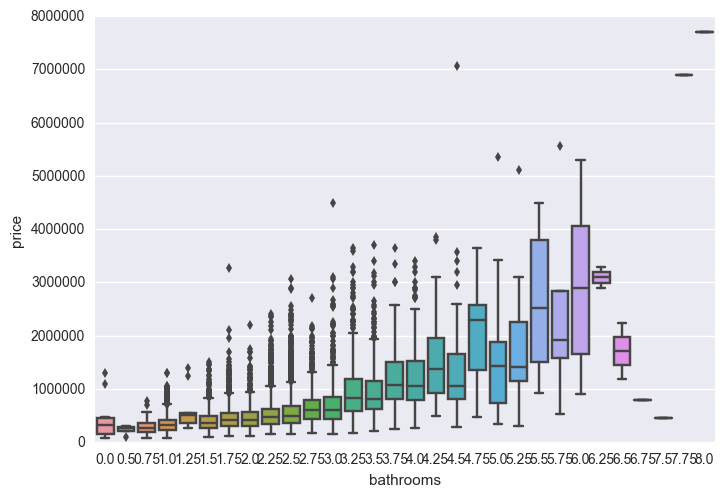

In [20]:
sns.boxplot(x="bathrooms", y="price", data=house)
sns.plt.show()

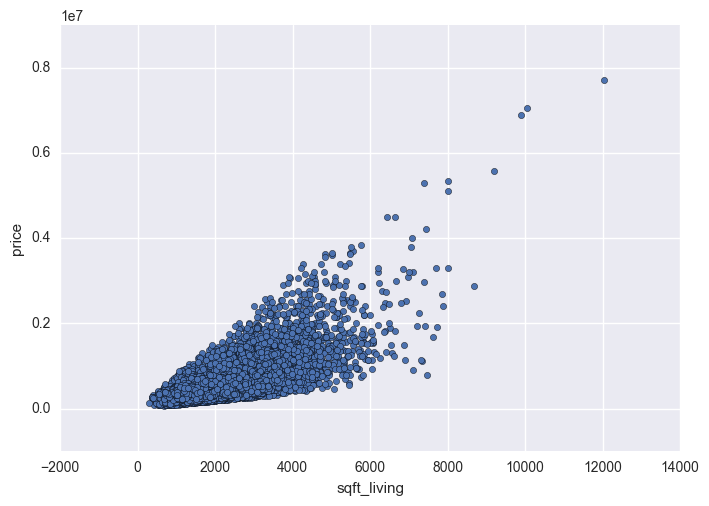

In [21]:
house.plot(kind="scatter", x="sqft_living", y="price")
sns.plt.show()

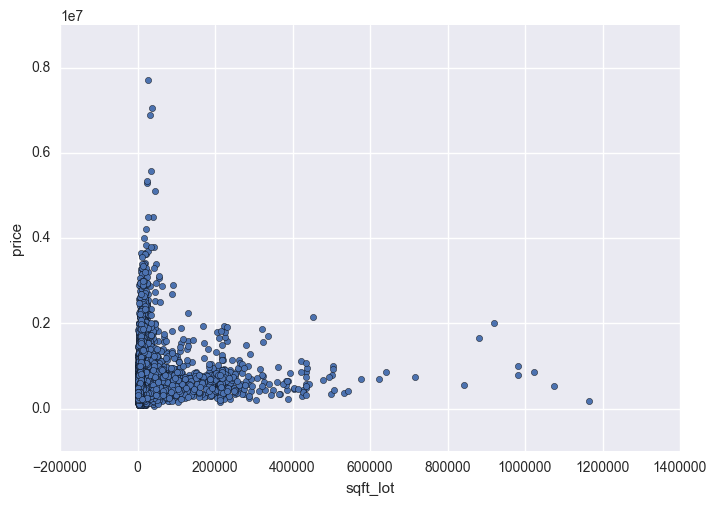

In [38]:
house.plot(kind="scatter", x="sqft_lot", y="price")
sns.plt.show()

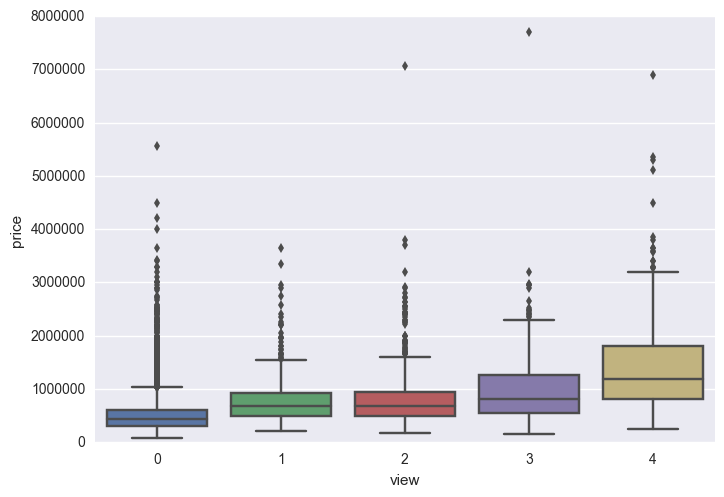

In [25]:
sns.boxplot(x="view", y="price", data=house)
sns.plt.show()

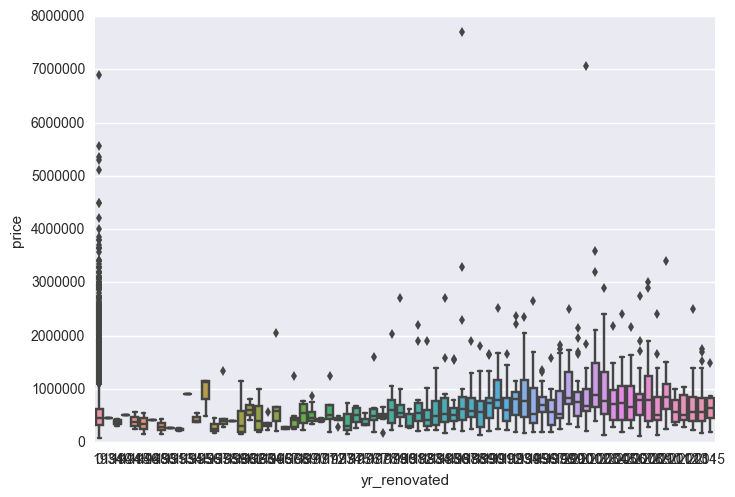

In [28]:
sns.boxplot(x="yr_renovated", y="price", data=house)
sns.plt.show()

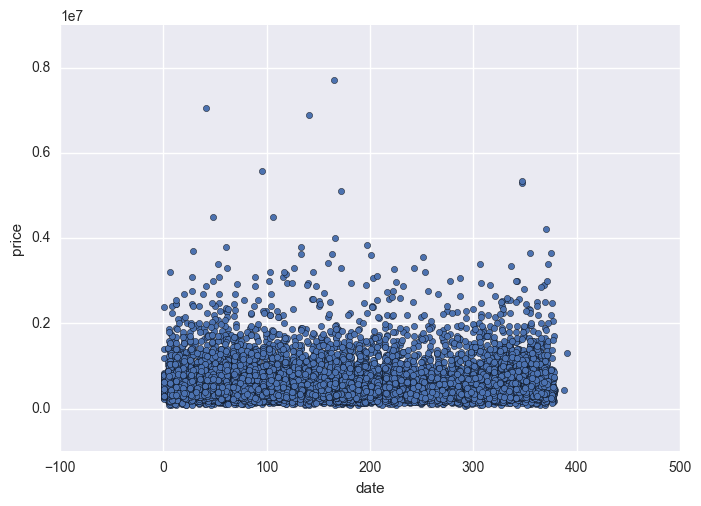

In [11]:
house.plot(kind="scatter", x="date", y="price")
sns.plt.show()

In [12]:
#数据中缺失值的查找
house_value_ravel=house.values.ravel()
print('数据中缺失值个数',len(house_value_ravel[house_value_ravel==np.nan]))

数据中缺失值个数 0


In [14]:
#查看样本中数据分布
print('数据中各类别样本分布：')
print(house['bedrooms'].value_counts().sort_index())


数据中各类别样本分布：
0       13
1      199
2     2760
3     9823
4     6879
5     1600
6      272
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64


In [15]:
#查看样本中数据分布
print('数据中各类别样本分布：')
print(house['bathrooms'].value_counts().sort_index())

数据中各类别样本分布：
0.00      10
0.50       4
0.75      72
1.00    3851
1.25       9
1.50    1446
1.75    3047
2.00    1930
2.25    2047
2.50    5379
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     135
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50       9
5.75       4
6.00       6
6.25       2
6.50       2
6.75       1
7.50       1
7.75       1
8.00       1
Name: bathrooms, dtype: int64


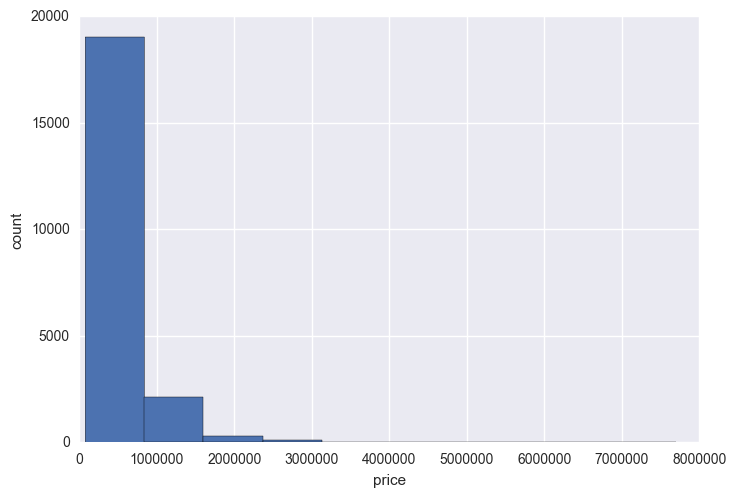

In [16]:
#房价直方图
house['price'].describe()
pl.hist(house["price"])
pl.xlabel('price')
pl.ylabel('count')
pl.show()

In [6]:
#0-1标准化
minmax_scale=preprocessing.MinMaxScaler().fit(house[["date","bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]])
df_minmax=minmax_scale.transform(house[["date","bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]])

In [7]:
#打印标准化后最小值和最大值
print('Min-value after 0-1 scaling:\nbedrooms={:.2f},bathrooms={:.2f},sqft_living={:.2f},sqft_lot={:.2f},floors={:.2f},waterfront={:.2f},view={:.2f},condition={:.2f},grade={:.2f},sqft_above={:.2f},sqrt_basement={:.2f},yr_built={:.2f},yr_renovated={:.2f},zipcode={:.2f},lat={:.2f},long={:.2f},sqft_living15={:.2f},sqrt_lot15={:.2f}'.format(df_minmax[:,0].min(),df_minmax[:,1].min(),df_minmax[:,2].min(),df_minmax[:,3].min(),df_minmax[:,4].min(),df_minmax[:,5].min(),df_minmax[:,6].min(),df_minmax[:,7].min(),df_minmax[:,8].min(),df_minmax[:,9].min(),df_minmax[:,10].min(),df_minmax[:,11].min(),df_minmax[:,12].min(),df_minmax[:,13].min(),df_minmax[:,14].min(),df_minmax[:,15].min(),df_minmax[:,16].min(),df_minmax[:,17].min()))
print('\nMax-value after 0-1 scaling:\nbedrooms={:.2f},bathrooms={:.2f},sqft_living={:.2f},sqft_lot={:.2f},floors={:.2f},waterfront={:.2f},view={:.2f},condition={:.2f},grade={:.2f},sqft_above={:.2f},sqrt_basement={:.2f},yr_built={:.2f},yr_renovated={:.2f},zipcode={:.2f},lat={:.2f},long={:.2f},sqft_living15={:.2f},sqrt_lot15={:.2f}'.format(df_minmax[:,0].max(),df_minmax[:,1].max(),df_minmax[:,2].max(),df_minmax[:,3].max(),df_minmax[:,4].max(),df_minmax[:,5].max(),df_minmax[:,6].max(),df_minmax[:,7].max(),df_minmax[:,8].max(),df_minmax[:,9].max(),df_minmax[:,10].max(),df_minmax[:,11].max(),df_minmax[:,12].max(),df_minmax[:,13].max(),df_minmax[:,14].max(),df_minmax[:,15].max(),df_minmax[:,16].max(),df_minmax[:,17].max()))

Min-value after 0-1 scaling:
bedrooms=0.00,bathrooms=0.00,sqft_living=0.00,sqft_lot=0.00,floors=0.00,waterfront=0.00,view=0.00,condition=0.00,grade=0.00,sqft_above=0.00,sqrt_basement=0.00,yr_built=0.00,yr_renovated=0.00,zipcode=0.00,lat=0.00,long=0.00,sqft_living15=0.00,sqrt_lot15=0.00

Max-value after 0-1 scaling:
bedrooms=1.00,bathrooms=1.00,sqft_living=1.00,sqft_lot=1.00,floors=1.00,waterfront=1.00,view=1.00,condition=1.00,grade=1.00,sqft_above=1.00,sqrt_basement=1.00,yr_built=1.00,yr_renovated=1.00,zipcode=1.00,lat=1.00,long=1.00,sqft_living15=1.00,sqrt_lot15=1.00


In [3]:
#打印相关系数矩阵
house[[ "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.528833,0.592124,0.031008,0.180748,-0.007568,0.080687,0.025660,0.366007,0.490169,0.308489,0.159058,0.019293,-0.156953,-0.010718,0.133526,0.402073,0.028726
bathrooms,0.528833,1.000000,0.753179,0.086654,0.501106,0.060960,0.185215,-0.124635,0.664242,0.683692,0.279608,0.506570,0.049699,-0.203767,0.024060,0.222477,0.568648,0.080505
sqft_living,0.592124,0.753179,1.000000,0.173394,0.354515,0.100447,0.281705,-0.058155,0.763430,0.876270,0.430202,0.318762,0.054094,-0.199659,0.052118,0.239891,0.758309,0.178846
sqft_lot,0.031008,0.086654,0.173394,1.000000,-0.006657,0.023531,0.067149,-0.009474,0.115843,0.185439,0.011830,0.056781,0.009170,-0.132892,-0.087200,0.235925,0.150324,0.704164
floors,0.180748,0.501106,0.354515,-0.006657,1.000000,0.024276,0.029131,-0.263644,0.458187,0.524267,-0.247715,0.489233,0.006574,-0.059036,0.049416,0.125114,0.279637,-0.015295
waterfront,-0.007568,0.060960,0.100447,0.023531,0.024276,1.000000,0.401268,0.017046,0.081192,0.070639,0.075775,-0.026457,0.090662,0.030741,-0.014318,-0.042038,0.085805,0.033364
view,0.080687,0.185215,0.281705,0.067149,0.029131,0.401268,1.000000,0.046417,0.250021,0.164889,0.274751,-0.053842,0.103208,0.085731,0.006800,-0.079625,0.279870,0.066444
condition,0.025660,-0.124635,-0.058155,-0.009474,-0.263644,0.017046,0.046417,1.000000,-0.144308,-0.157989,0.175511,-0.361261,-0.060515,0.002883,-0.014966,-0.106306,-0.092645,-0.001484
grade,0.366007,0.664242,0.763430,0.115843,0.458187,0.081192,0.250021,-0.144308,1.000000,0.755808,0.165732,0.446808,0.013710,-0.184544,0.114042,0.197727,0.713415,0.116341
sqft_above,0.490169,0.683692,0.876270,0.185439,0.524267,0.070639,0.164889,-0.157989,0.755808,1.000000,-0.057981,0.424294,0.022720,-0.261264,-0.001327,0.343420,0.732675,0.191544


In [9]:
V=pd.DataFrame(df_minmax) 

In [10]:
V.head(15) #查看标准化后结果

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.420513,0.272727,0.12500,0.075680,0.004406,0.0,0.0,0.0,0.50,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.011425
1,0.566667,0.272727,0.28125,0.193878,0.005774,0.4,0.0,0.0,0.50,0.500000,0.219370,0.114286,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.015970
2,0.766667,0.181818,0.12500,0.040816,0.008142,0.0,0.0,0.0,0.50,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.016937
3,0.566667,0.363636,0.37500,0.142007,0.003848,0.0,0.0,0.0,1.00,0.500000,0.088681,0.260000,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.009939
4,0.748718,0.272727,0.25000,0.118197,0.006493,0.0,0.0,0.0,0.50,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.015659
5,0.025641,0.363636,0.56250,0.436224,0.087101,0.0,0.0,0.0,0.50,0.833333,0.420070,0.437143,0.878261,0.000000,0.262626,0.804568,0.426910,0.750473,0.231462
6,0.143590,0.272727,0.28125,0.121173,0.005410,0.4,0.0,0.0,0.50,0.500000,0.166278,0.000000,0.826087,0.000000,0.010101,0.247386,0.159468,0.316469,0.014096
7,0.661538,0.272727,0.18750,0.065476,0.007894,0.0,0.0,0.0,0.50,0.500000,0.089848,0.000000,0.547826,0.000000,0.994949,0.407914,0.169435,0.215281,0.020706
8,0.892308,0.272727,0.12500,0.126701,0.005969,0.0,0.0,0.0,0.50,0.500000,0.088681,0.208571,0.521739,0.000000,0.732323,0.573267,0.151163,0.237653,0.017054
9,0.805128,0.272727,0.31250,0.136054,0.005188,0.4,0.0,0.0,0.50,0.500000,0.186698,0.000000,0.895652,0.000000,0.186869,0.341805,0.405316,0.342626,0.015813


In [3]:
#去掉id和price开始模型的构建
house = house.drop(['id'], axis = 1)
house1=house.drop(['price'],axis=1)
house2 = house.drop(['price'],axis=1)
#增加样本特征
a1 = house2['grade']
b1=[pow(a1[i],4.7) for i in range(len(a1))]
house2['g2']=pd.Series(b1,index = house2.index)

a2 = house2['bathrooms']
b2=[pow(a2[i],1.0000000001) for i in range(len(a2))]
house2['bath2']=pd.Series(b2,index = house2.index)

a3 = house2['lat']
b3=[pow(a3[i],8.6)for i in range(len(a3))]
house2['lat2']=pd.Series(b3,index = house2.index)

a4 = house2['sqft_lot']
b4=[pow(1/a4[i],0.3)for i in range(len(a4))]
house2['sqflot2']=pd.Series(b4,index = house2.index)

a5 = house2['yr_built']
b5=[pow(a5[i],4.1) for i in range(len(a5))]
house2['yrblt2']=pd.Series(b5,index = house2.index)

In [5]:
#未增加样本特征的训练集，测试集的划分
train_x = house1.iloc[0:15130,]
test_x = house1.iloc[15130:21613,]
Y=house['price']
train_y = Y.iloc[0:15130]
test_y = Y.iloc[15130:21613]

In [6]:
#增加了样本特征的训练集
train_x1 = house2.iloc[0:15130,]
test_x1 = house2.iloc[15130:21613,]

In [6]:
#利用线性回归模型开始对房价进行预测
regr = linear_model.LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
regr.fit(train_x1,train_y)
pred = regr.predict(test_x1)
#评价模型的建立
r2 = r2_score(test_y, pred)
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y,pred)
rmse = mse**0.5
print("R2:",r2)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

R2: 0.746117349086
Mean absolute error: 116151.042849
Mean squared error: 34433741378.3
Root mean squared error: 185563.308276


In [7]:
#利用Lasso回归模型开始对房价进行预测
regr = linear_model.Lasso()
regr.fit(train_x1,train_y)
pred = regr.predict(test_x1)
#评价模型的建立
r2 = r2_score(test_y, pred)
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y,pred)
rmse = mse**0.5
print("R2:",r2)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

R2: 0.736149339326
Mean absolute error: 119042.683017
Mean squared error: 35785688307.0
Root mean squared error: 189171.05568


C:\Users\Ray\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [8]:
#利用岭回归模型开始对房价进行预测
regr = linear_model.Ridge(alpha=0.5)
regr.fit(train_x1,train_y)
pred = regr.predict(test_x1)
#评价模型的建立
r2 = r2_score(test_y, pred)
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y,pred)
rmse = mse**0.5
print("R2:",r2)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

R2: 0.735692242183
Mean absolute error: 119466.135469
Mean squared error: 35847683739.6
Root mean squared error: 189334.845551


In [11]:
#利用随机森林对房价进行预测
clf=RandomForestClassifier(n_estimators = 42)
clf.fit(train_x,train_y)
pred=clf.predict(test_x)

#评价模型的建立
r2 = r2_score(test_y, pred)
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y,pred)
rmse = mse**0.5
print("R2:",r2)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

R2: 0.734921236532
Mean absolute error: 103343.48811
Mean squared error: 35952254135.0
Root mean squared error: 189610.796462
